# Physics single slit experiment | Jacob & Niklas

### Einleitung

Im folgenden Dokument wird der Versuch vom 05.10.2021 von Jacob und Niklas dokumentiert.
Es wurde mittels eines Ultaschallsenders und Ultraschallempfängers in einem einzel Splat das sich ergebende Muster gemessen. Dabei wurden die Knotenlinien und die Maxima gemessen. In Abhängigkeit des Winkels $\alpha$, welcher bei 0 parallel auf Höhe des Splates liegt.

### Imports

In [23]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Settings

In [24]:
alpha_column = "Alpha (in Grad)"
voltage_column = "Spannung (in Volt)"
voltage_adjust_column = "Spannung a.u."
sigma_column = "Sigma (in Prozent)"

### Daten

In [25]:
df = pd.read_csv('Data/Physics_single_slit/Data_Paul.csv', sep=",")

In [26]:
# finding the maxima and setting the volatge according to it
max_voltage = df[voltage_column].max()
# adjusting the values from 1 <--> max
df[voltage_adjust_column] = list(map(lambda d: d*1/max_voltage, df[voltage_column]))
# sort the dataframe
df = df.sort_values(by=[alpha_column])
df = df.reset_index(drop=True)

In [27]:
df.head()

,Alpha (in Grad),Spannung (in Volt),Sigma (in Prozent),Spannung a.u.
0,0,3.36,0.05,1.000000
1,5,2.56,0.05,0.761905
2,10,1.44,0.05,0.428571
3,15,0.12,0.05,0.035714
4,17,0.84,0.20,0.250000


In [28]:
#plt.scatter(df[alpha_column], df[voltage_adjust_column])
#plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

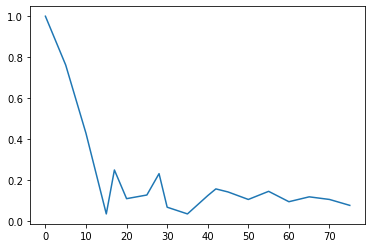

In [29]:
plt.plot(df[alpha_column], df[voltage_adjust_column])
plt.show

In [30]:
# objective function for fitting
def objective(x, a):
    phi = 2 * np.pi * (a) * np.sin(x * np.pi / 180)
    return 2 * (1/phi) * abs(np.sin(phi * 0.5))

In [31]:
min_v = 1e-8
max_v = 80
n = 100

In [32]:
x_data = np.array(list(df[alpha_column]+1e-8))
y_data = np.array(list(df[voltage_adjust_column]))
sigma_data = np.array(list(df[sigma_column]))

In [75]:
# fit curve
# popt, pcov = curve_fit(objective, x_data, y_data)
popt, pcov = curve_fit(objective, x_data, y_data, sigma=sigma_data, absolute_sigma=True, p0=3)

In [76]:
print(popt)
print(pcov)

[3.60800859]
[[0.00418009]]


In [77]:
# define new input values
x_new = np.linspace(min_v, max_v, n)
# unpack optima parameters for the objective function
a = popt
print("Fit value b/lamda:  ", a[0])
# use optimal parameters to calculate new values
y_new = objective(x_new, a)

Fit value b/lamda:   3.6080085906570862


In [78]:
# getting the r2 values

residuals = y_data - objective(x_data, a)
ss_res = np.sum(residuals**2)

ss_tot = np.sum((y_data-np.mean(y_data))**2)

r_squared = 1 - (ss_res / ss_tot)
print("Errors: ", ss_res)
print("R2: ", r_squared)

Errors:  0.0917431948985953
R2:  0.9205148255958625


In [79]:
# compute chi-square
chisq = sum((y_data - objective(x_data, a))**2/sigma_data**2)

In [80]:
#plt.plot(x_new, y_new, '--', c='r', label="Fit curve with: "+str(a))
#plt.plot(df[alpha_column]+min_v, df[voltage_adjust_column], c='g', label="Original data")
#plt.legend()
#
#plt.show()

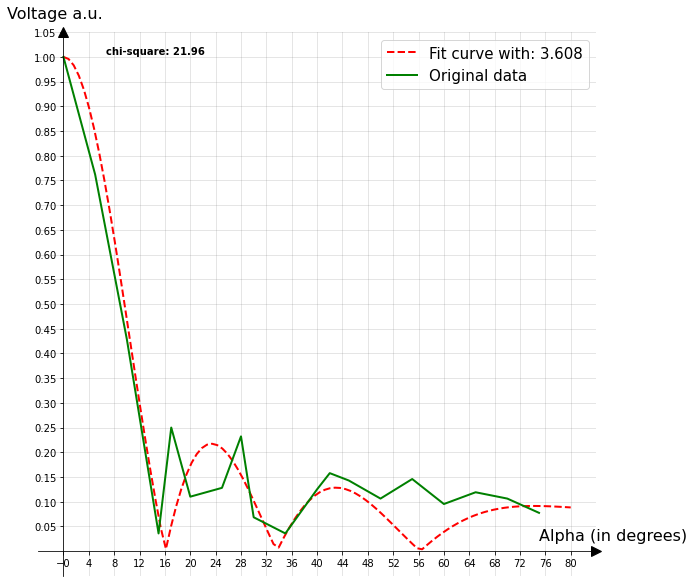

In [81]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('w'),

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -1*min_v, max_v, 0, 1.05
ticks_frequency_x = 4
ticks_frequency_y = 0.05


# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('Alpha (in degrees)', size=16, labelpad=-40, x=1.03)
ax.set_ylabel('Voltage a.u.', size=16, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax+1, ticks_frequency_x)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency_y)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Draw arrows
arrow_fmt = dict(markersize=10, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

ax.plot(x_new, y_new, '--', c='r', label="Fit curve with: "+str(round(a[0], 4)), linewidth=2)
ax.plot(df[alpha_column]+1e-8, df[voltage_adjust_column], c='g', label="Original data", linewidth=2)



plt.figtext(0.22,0.85,"chi-square: %.2f"%chisq,fontweight="bold")


plt.legend(fontsize=15)
plt.grid(True)
plt.show()

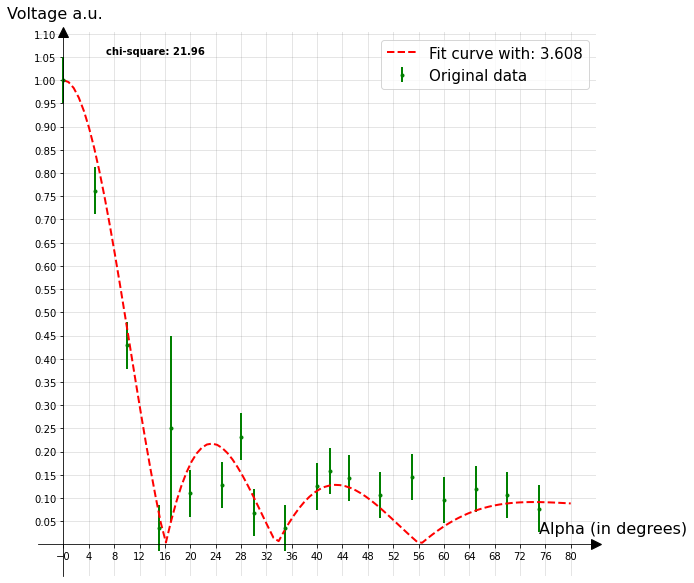

In [82]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('w'),

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -1*min_v, max_v, 0, 1.05
ticks_frequency_x = 4
ticks_frequency_y = 0.05


# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('Alpha (in degrees)', size=16, labelpad=-40, x=1.03)
ax.set_ylabel('Voltage a.u.', size=16, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax+1, ticks_frequency_x)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency_y)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Draw arrows
arrow_fmt = dict(markersize=10, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

ax.plot(x_new, y_new, '--', c='r', label="Fit curve with: "+str(round(a[0], 4)), linewidth=2)
ax.errorbar(x_data, y_data, sigma_data, fmt='g.', label="Original data", linewidth=2)

plt.figtext(0.22,0.85,"chi-square: %.2f"%chisq,fontweight="bold")


plt.legend(fontsize=15)
plt.grid(True)
plt.show()

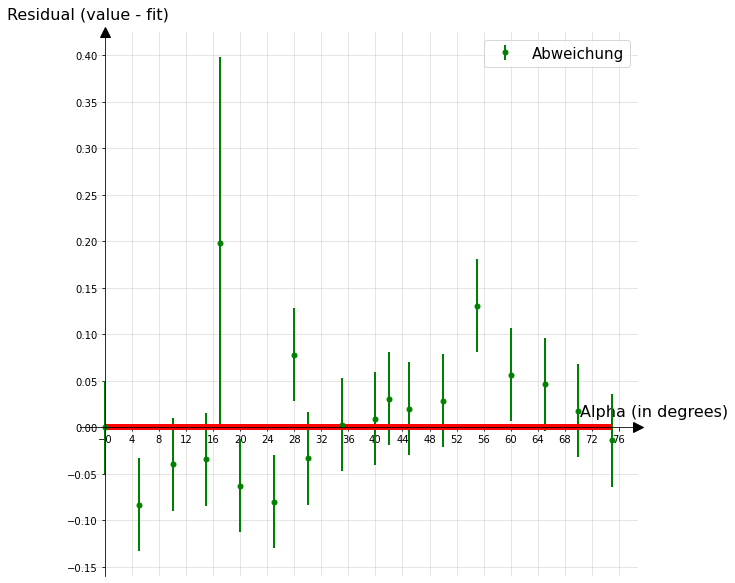

In [83]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('w'),

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -1*min_v, max_v, -0.4, 0.4
ticks_frequency_x = 4
ticks_frequency_y = 0.05


# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('Alpha (in degrees)', size=16, labelpad=-40, x=1.03)
ax.set_ylabel('Residual (value - fit)', size=16, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax+1, ticks_frequency_x)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency_y)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Draw arrows
arrow_fmt = dict(markersize=10, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

ax.errorbar(x_data, y_data-objective(x_data, a), sigma_data, fmt='g.', label="Abweichung", markersize=10, linewidth=2)

ax.hlines(0,x_data.min(),x_data.max(), linewidth=6, color='r')

plt.legend(fontsize=15)
plt.grid(True)
plt.show()